In [0]:
import torch
import numpy as np
import torchvision
from matplotlib import pyplot as plt
import torch.nn as nn


In [0]:
from functools import reduce

In [0]:
class simple_FCN(nn.Module):

    def __init__(self):
        
        super(simple_FCN, self).__init__()
        self.features=nn.Sequential(  # 60x60
            nn.Linear(2,3),  # 58x58
            nn.ReLU(True),
            nn.Linear(3,1)

        )  
        self.optimizer = torch.optim.SGD(self.parameters(),lr = 0.0005)
        def init_weights(m):
            if type(m) == nn.Linear:
                torch.nn.init.xavier_uniform(m.weight)
                m.bias.data.fill_(0.01)

        self.features.apply(init_weights)


    def forward(self,x):
        y = (self.features(x))
        out = torch.cat((y,-y),1)
        return(torch.cat((y,-y),1))
    
    def train(self,x,labels):
#        for i in range(15):
            i = 0
            data=torch.tensor(x,device = 'cuda:0').float()
            pred = self.forward(data)
            labels=torch.tensor(labels,device = 'cuda:0')
            criterion= nn.CrossEntropyLoss()
            loss = criterion(pred,labels.long())
            loss.backward()
            
            self.optimizer.step()
            return(loss)
            #loss.backward()
            
            
            

In [0]:
Model = simple_FCN()
Model.to('cuda:0')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  from ipykernel import kernelapp as app


simple_FCN(
  (features): Sequential(
    (0): Linear(in_features=2, out_features=3, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=3, out_features=1, bias=True)
  )
)

In [0]:
import itertools
lst = list(itertools.product([1, -1], repeat=13))
lst = torch.tensor(lst,device='cuda:0')/2.0

In [0]:
a1_min = 0
a1_max = 1
a2_min = 2
a2_max = 3


In [0]:
A=np.random.uniform(a1_min,a1_max,10000)
B=np.random.uniform(a2_min,a2_max,10000)



In [0]:
t = np.arange(0,2*np.pi,0.001)

sin = np.sin(t)
cos = np.cos(t)

index_A = np.random.randint(0,t.shape[0],500)
index_B = np.random.randint(0,t.shape[0],500)

data_A = np.append(A[index_A]*sin[index_A][np.newaxis],A[index_A]*cos[index_A][np.newaxis],axis = 0)
data_B = np.append(B[index_B]*sin[index_B][np.newaxis],B[index_B]*cos[index_B][np.newaxis],axis = 0)
total_data = np.append(data_A,data_B,axis = 1)

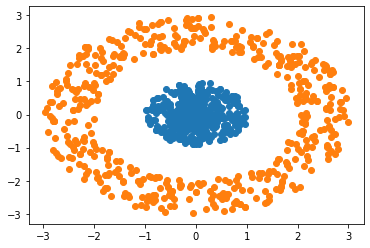

In [0]:
plt.scatter(data_A[0],data_A[1])
plt.scatter(data_B[0],data_B[1])

In [0]:
loss_matrix = np.zeros((lst.shape[0],200))

In [0]:
for i in range(lst.shape[0]):
        #initialize
        state_dict = Model.state_dict()
        state_dict['features.0.weight'] = (lst[i][0:6]).reshape(3,2)
        state_dict['features.0.bias'] = (lst[i][6:9]).reshape(3)
        state_dict['features.2.weight'] = (lst[i][9:12]).reshape(1,3)
        state_dict['features.2.bias'] = (lst[i][12]).reshape(1)
        Model.load_state_dict(state_dict)
        temp_loss = []
        for k in range(200):
            labels = np.zeros(1000)
            labels[500:] = 1
            l = Model.train(total_data.T,labels)
            temp_loss.append(float(l.cpu().detach()))
        loss_matrix[i] += np.array(temp_loss)
        
np.save('0.0005',loss_matrix)

In [0]:
lst[0]

tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000], device='cuda:0')

In [0]:
loss_matrix=np.load('./out1')

FileNotFoundError: ignored

In [0]:
loss_matrix

In [0]:
b1=np.where(loss_matrix[:,5]>0.1)[0]

In [0]:
b2=np.where(loss_matrix[:,10]>0.1)[0]

In [0]:
b3=np.where(loss_matrix[:,20]>0.1)[0]

In [0]:
b4=np.where(loss_matrix[:,50]>0.1)[0]

In [0]:
b5=np.where(loss_matrix[:,150]>0.1)[0]

In [0]:
b6=np.where(loss_matrix[:,199]>0.1)[0]

In [0]:
reduce(np.intersect1d, ([b1],[b2],[b3],[b4],[b5],[b6]))

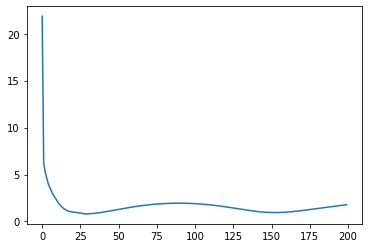

In [0]:
plt.plot(loss_matrix[16])

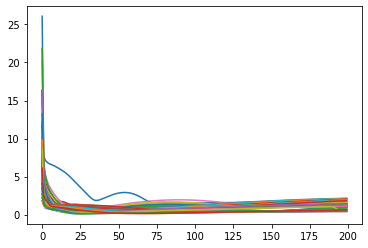

In [0]:
for i in range(0,94):
  plt.plot(loss_matrix[i])

In [0]:
b3.shape

(331,)

In [0]:
b4.shape

(371,)

In [0]:
b5.shape

(689,)

In [0]:
b6.shape

(777,)